In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import math

In [4]:
# 读取数据，pd.read_csv默认生成DataFrame对象，需将其转换成Series对象
df_ori = pd.read_csv('../../dataset/MA-year.csv',header=0)
df_ori.index = pd.to_datetime(df_ori['Date'])  # 将字符串索引转换成时间索引
#df=df_ori.asfreq(freq='3d',method='ffill')
df_ori.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-02-08,2018-02-08,168.770004,169.240005,160.460007,160.619995,159.505783,6557700
2018-02-09,2018-02-09,161.669998,166.490005,158.570007,165.199997,164.054016,6303000
2018-02-12,2018-02-12,166.800003,168.820007,165.580002,168.190002,167.023285,5227400
2018-02-13,2018-02-13,167.330002,170.770004,167.009995,170.119995,168.939896,3471000
2018-02-14,2018-02-14,169.360001,172.660004,169.000000,172.520004,171.323257,4203700


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
sc_close=sc.fit_transform(df_ori['Close'].values.reshape(-1,1))

In [6]:
def data_to_x_y(data,n_in_steps,n_out_steps):
    X_data,y_data=[],[]
    for i in range(0,data.shape[0]-n_in_steps-n_out_steps):
        X_data.append(data[i:i+n_in_steps])
        y_data.append(data[i+n_in_steps+n_out_steps-1])
    X_data=np.array(X_data)
    y_data=np.array(y_data)
    #X_data=X_data.reshape(X_train.shape[0],X_train.shape[1],1)
    #y_data=y_data.reshape(y_train.shape[0],1)
    return X_data,y_data

In [7]:
X_train,y_train=data_to_x_y(sc_close,5,1)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1])
y_train=y_train.reshape(y_train.shape[0])
print(X_train.shape)
print(y_train.shape)

(246, 5)
(246,)


In [12]:
X=np.array([x for x in range(sc_close.shape[0])]).reshape(-1,1)
Y=sc_close

In [75]:
#SVR Model
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.01)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
rbf_fit = svr_rbf.fit(X_train, y_train)
# lin_fit = svr_lin.fit(X_train,y_train)
# poly_fit = svr_poly.fit(X_train, y_train)

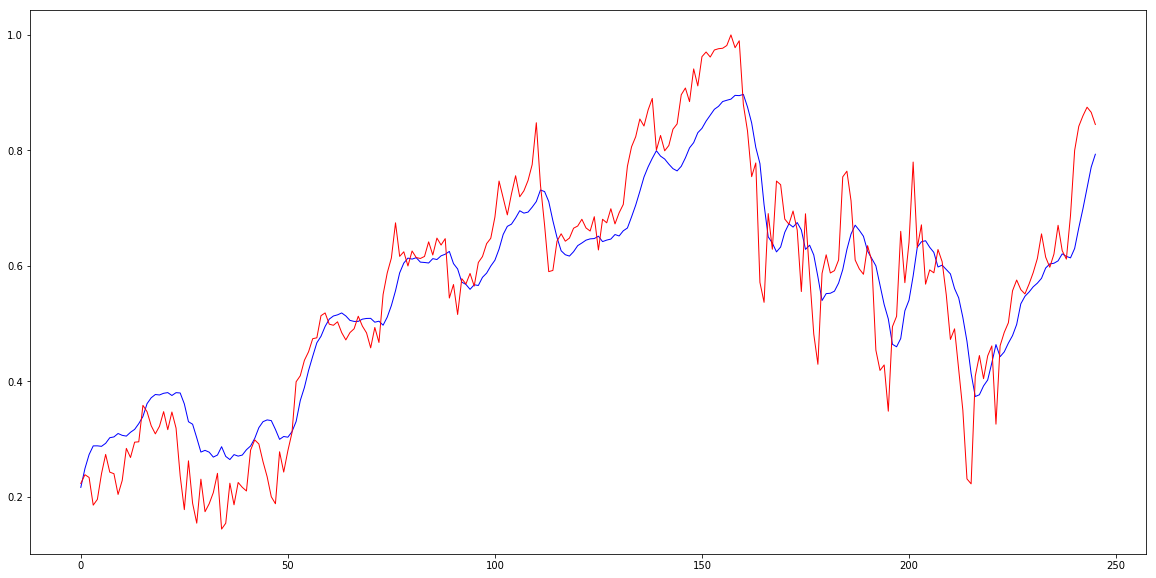

In [76]:
#训练集拟合
ypre=rbf_fit.predict(X_train)
plt.figure(figsize=(20,10))
plt.plot(ypre,color='blue',lw=1,label='fitting')
plt.plot(y_train,color='red',lw=1,label='origin')
plt.show()

In [96]:
predictions=list()
days=60
timestep=5
test=ypre.copy()

for i in range(days):
    X_test=np.transpose(test[-timestep:])
    yhat=rbf_fit.predict(X_test.reshape(1,-1))
    print(test.shape)
#     test=np.vstack((test,yhat))
    test=np.append(test,yhat)
    print(test.shape)
    predictions.append(yhat[0])
# ypre_new=ypre.copy()

# X_test_reshape=np.array(np.array(X_test).reshape(-1,1))
# yhat=rbf_fit.predict(X_test_reshape)
# ypre_new=np.append(ypre_new,yhat[-days:])
# predictions.append(yhat)

(246,)
(247,)
(247,)
(248,)
(248,)
(249,)
(249,)
(250,)
(250,)
(251,)
(251,)
(252,)
(252,)
(253,)
(253,)
(254,)
(254,)
(255,)
(255,)
(256,)
(256,)
(257,)
(257,)
(258,)
(258,)
(259,)
(259,)
(260,)
(260,)
(261,)
(261,)
(262,)
(262,)
(263,)
(263,)
(264,)
(264,)
(265,)
(265,)
(266,)
(266,)
(267,)
(267,)
(268,)
(268,)
(269,)
(269,)
(270,)
(270,)
(271,)
(271,)
(272,)
(272,)
(273,)
(273,)
(274,)
(274,)
(275,)
(275,)
(276,)
(276,)
(277,)
(277,)
(278,)
(278,)
(279,)
(279,)
(280,)
(280,)
(281,)
(281,)
(282,)
(282,)
(283,)
(283,)
(284,)
(284,)
(285,)
(285,)
(286,)
(286,)
(287,)
(287,)
(288,)
(288,)
(289,)
(289,)
(290,)
(290,)
(291,)
(291,)
(292,)
(292,)
(293,)
(293,)
(294,)
(294,)
(295,)
(295,)
(296,)
(296,)
(297,)
(297,)
(298,)
(298,)
(299,)
(299,)
(300,)
(300,)
(301,)
(301,)
(302,)
(302,)
(303,)
(303,)
(304,)
(304,)
(305,)
(305,)
(306,)


In [97]:
print(predictions)

[0.7063564221377874, 0.7056422657095697, 0.7026587589118812, 0.6959804500262111, 0.6855075147904138, 0.6710178806821877, 0.6645808372711086, 0.6578500503446904, 0.6509219530958378, 0.6441432769680655, 0.6378605049827845, 0.6326202057035779, 0.6276525628248698, 0.6229963410525337, 0.6186945654974904, 0.6147589103725775, 0.6111731261478702, 0.6078537578850939, 0.6047920295196182, 0.6019757259290459, 0.5993873822463166, 0.5970070993524813, 0.5948144128847602, 0.5927961482049917, 0.590939137316948, 0.5892304519081318, 0.5876579514619823, 0.586210573314053, 0.5848785479055609, 0.5836527236089056, 0.5825246019408495, 0.5814863635526548, 0.5805308406402662, 0.5796514605508466, 0.578842155212047, 0.5780973352223016, 0.577411859495848, 0.5767809998713634, 0.5762004057649712, 0.5756660714083686, 0.5751743101768975, 0.5747217297138526, 0.5743052082513416, 0.5739218727392134, 0.573569078917275, 0.5732443932684562, 0.5729455762423148, 0.5726705667542973, 0.572417467937427, 0.5721845340582875, 0.571

In [99]:
inv_yhat=sc.inverse_transform(test.reshape(-1,1))
print(inv_yhat.shape)

(306, 1)


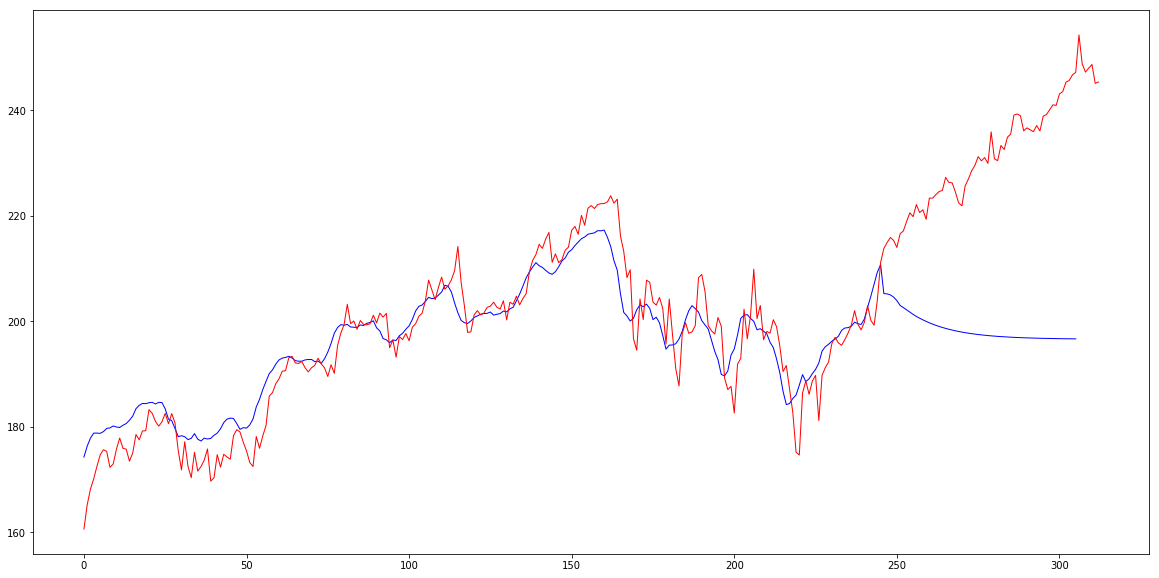

In [100]:
df_all=pd.read_csv('../../dataset/MA-year-now.csv',header=0)
df_all_close=df_all['Close']
plt.figure(figsize=(20,10))
plt.plot(inv_yhat,color='blue',lw=1,label='prediction')
plt.plot(df_all_close.values,color='red',lw=1,label='Origin')
plt.show()

In [72]:
#误差统计
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
pre=inv_yhat[-days:]
ori=df_all_close.values[inv_yhat.shape[0]-days:inv_yhat.shape[0]]
print(pre.shape)
print(ori.shape)
avg=np.mean(ori)

rmse=math.sqrt(mean_squared_error(pre, ori))
mae=mean_absolute_error(pre,ori)

rmse_error_percentage=rmse/avg
mae_error_percentage=mae/avg
print('TEST RMSE: %.4f' % rmse)
print('TEST MAE: %.4f'% mae)
print("Test RMSE Error Percentage: %.2f/100.00" % (rmse_error_percentage * 100))
print("Test MAE Error Percentage: %.2f/100.00" % (mae_error_percentage * 100))

(60, 1)
(60,)
TEST RMSE: 39.3950
TEST MAE: 37.9984
Test RMSE Error Percentage: 16.89/100.00
Test MAE Error Percentage: 16.29/100.00
